In [34]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [35]:
sfr_csv = Path("Resources/Sales_count_sfr.csv")

In [36]:
single_family_df = pd.read_csv(sfr_csv)
single_family_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
0,102001,0,United States,country,NaN,33875.0,33287.0,42598.0,37571.0,39897.0,...,35946.0,23641.0,30239.0,41435.0,36483.0,41445.0,40799.0,32796.0,35729.0,32325.0
1,394913,1,"New York, NY",msa,NY,380.0,311.0,375.0,349.0,379.0,...,299.0,214.0,239.0,305.0,246.0,334.0,342.0,253.0,327.0,268.0
2,753899,2,"Los Angeles, CA",msa,CA,270.0,241.0,421.0,300.0,320.0,...,150.0,103.0,129.0,204.0,140.0,166.0,187.0,141.0,142.0,160.0
3,394463,3,"Chicago, IL",msa,IL,307.0,272.0,338.0,370.0,424.0,...,406.0,270.0,313.0,464.0,423.0,421.0,473.0,377.0,485.0,422.0
4,394514,4,"Dallas, TX",msa,TX,1490.0,1625.0,2178.0,1902.0,1736.0,...,1996.0,1197.0,1732.0,2193.0,1900.0,2029.0,1953.0,1551.0,1694.0,1474.0


In [37]:
date_range_columns = single_family_df.loc[:, '2018-01-31':'2023-09-30']

null_check = date_range_columns.isna().any(axis=1)

single_family_clean = single_family_df.loc[~null_check, :]

single_family_clean

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
0,102001,0,United States,country,NaN,33875.0,33287.0,42598.0,37571.0,39897.0,...,35946.0,23641.0,30239.0,41435.0,36483.0,41445.0,40799.0,32796.0,35729.0,32325.0
1,394913,1,"New York, NY",msa,NY,380.0,311.0,375.0,349.0,379.0,...,299.0,214.0,239.0,305.0,246.0,334.0,342.0,253.0,327.0,268.0
2,753899,2,"Los Angeles, CA",msa,CA,270.0,241.0,421.0,300.0,320.0,...,150.0,103.0,129.0,204.0,140.0,166.0,187.0,141.0,142.0,160.0
3,394463,3,"Chicago, IL",msa,IL,307.0,272.0,338.0,370.0,424.0,...,406.0,270.0,313.0,464.0,423.0,421.0,473.0,377.0,485.0,422.0
4,394514,4,"Dallas, TX",msa,TX,1490.0,1625.0,2178.0,1902.0,1736.0,...,1996.0,1197.0,1732.0,2193.0,1900.0,2029.0,1953.0,1551.0,1694.0,1474.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,394682,449,"Hinesville, GA",msa,GA,26.0,27.0,33.0,23.0,17.0,...,52.0,36.0,28.0,47.0,38.0,38.0,37.0,46.0,49.0,50.0
286,394298,473,"Aberdeen, WA",msa,WA,20.0,20.0,21.0,22.0,24.0,...,11.0,8.0,15.0,14.0,10.0,7.0,6.0,9.0,8.0,5.0
287,753893,477,"Jefferson, GA",msa,GA,55.0,89.0,130.0,81.0,84.0,...,100.0,63.0,79.0,117.0,99.0,105.0,104.0,92.0,67.0,74.0
306,395122,576,"St. Marys, GA",msa,GA,28.0,19.0,31.0,43.0,34.0,...,16.0,13.0,19.0,26.0,18.0,26.0,30.0,18.0,28.0,24.0


In [68]:
transposed_rough = pd.DataFrame(single_family_clean)

new_rows = []

for _, row in transposed_rough.iterrows():
    region_ID = row['RegionID']
    size_rank = row['SizeRank']
    region_name = row['RegionName']
    region_type = row['RegionType']
    state_name = row['StateName']
    
    for date_column in transposed_rough.columns[5:]:
        date = pd.to_datetime(date_column)
        value = row[date_column]
        
        new_rows.append([region_ID,size_rank,region_name,region_type,state_name, date, value])

transposed_df = pd.DataFrame(new_rows, columns=['Region ID','Size Rank','Region Name','Region Type','StateName', 'Date', 'New Home Sales Count'])

transposed_df

,Region ID,Size Rank,Region Name,Region Type,StateName,Date,New Home Sales Count
0,102001,0,United States,country,NaN,2018-01-31,33875.0
1,102001,0,United States,country,NaN,2018-02-28,33287.0
2,102001,0,United States,country,NaN,2018-03-31,42598.0
3,102001,0,United States,country,NaN,2018-04-30,37571.0
4,102001,0,United States,country,NaN,2018-05-31,39897.0
...,...,...,...,...,...,...,...
13243,394954,601,"Pahrump, NV",msa,NV,2023-05-31,11.0
13244,394954,601,"Pahrump, NV",msa,NV,2023-06-30,21.0
13245,394954,601,"Pahrump, NV",msa,NV,2023-07-31,14.0
13246,394954,601,"Pahrump, NV",msa,NV,2023-08-31,6.0


In [71]:
MSA_filter = ['United States','New York, NY','Los Angeles, CA','Chicago, IL','Dallas, TX']

short_table = transposed_df['Region Name'].isin(MSA_filter)
filtered_df = transposed_df[short_table]

filtered_df.head()

,Region ID,Size Rank,Region Name,Region Type,StateName,Date,New Home Sales Count
0,102001,0,United States,country,NaN,2018-01-31,33875.0
1,102001,0,United States,country,NaN,2018-02-28,33287.0
2,102001,0,United States,country,NaN,2018-03-31,42598.0
3,102001,0,United States,country,NaN,2018-04-30,37571.0
4,102001,0,United States,country,NaN,2018-05-31,39897.0


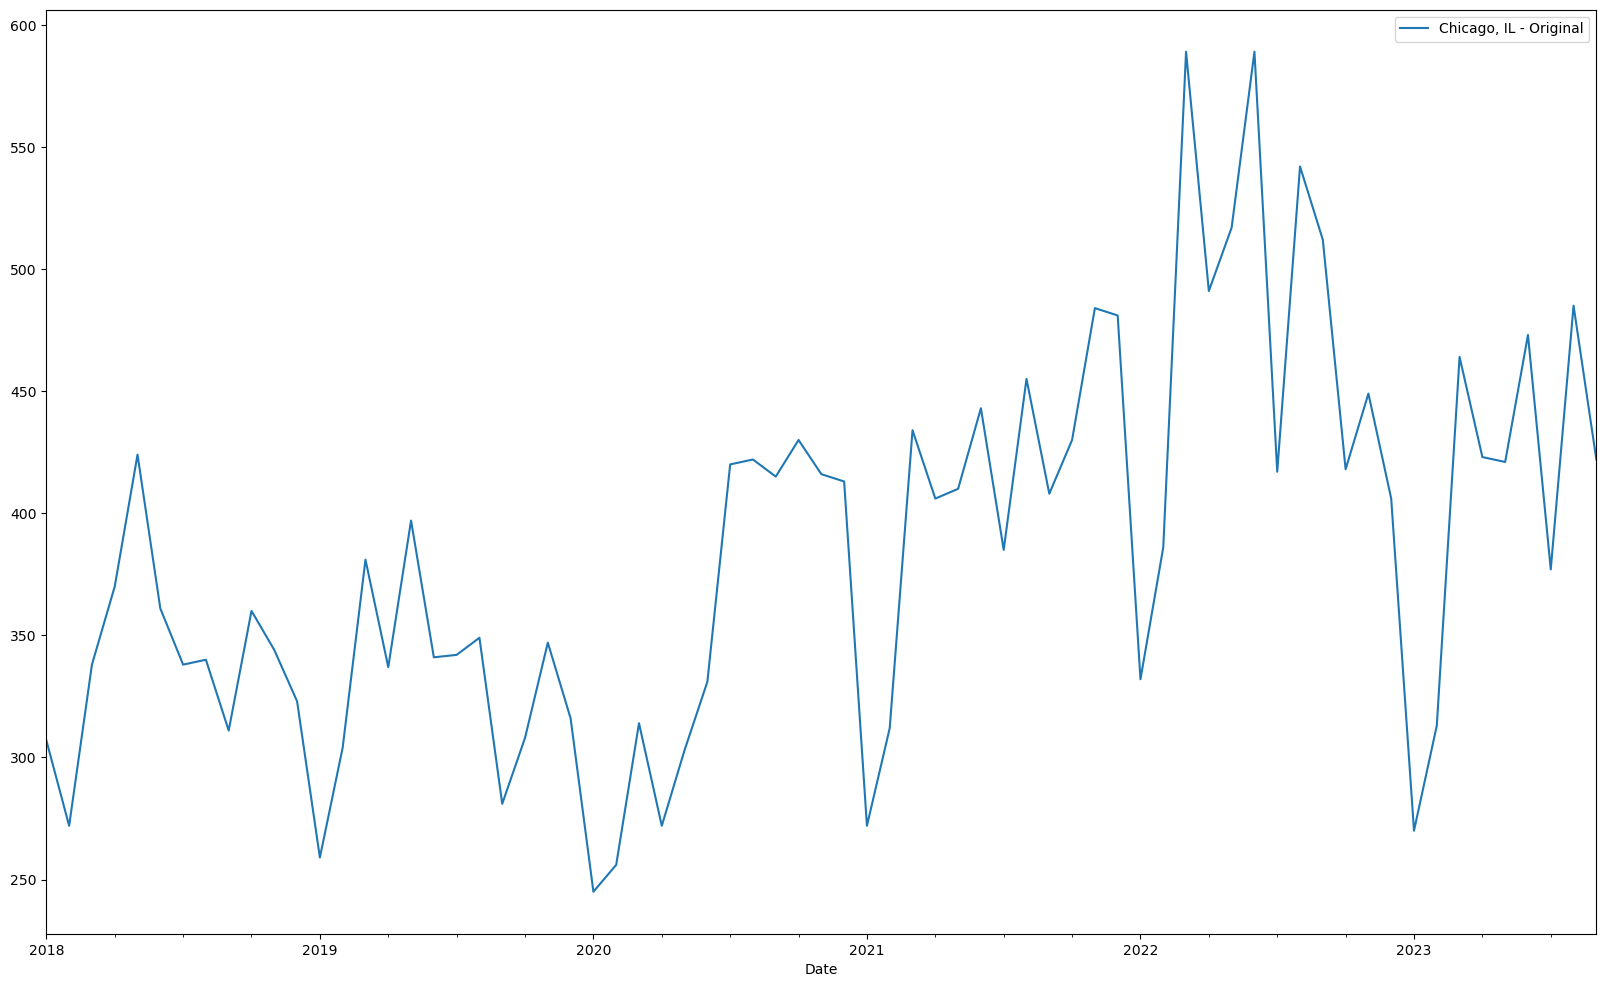

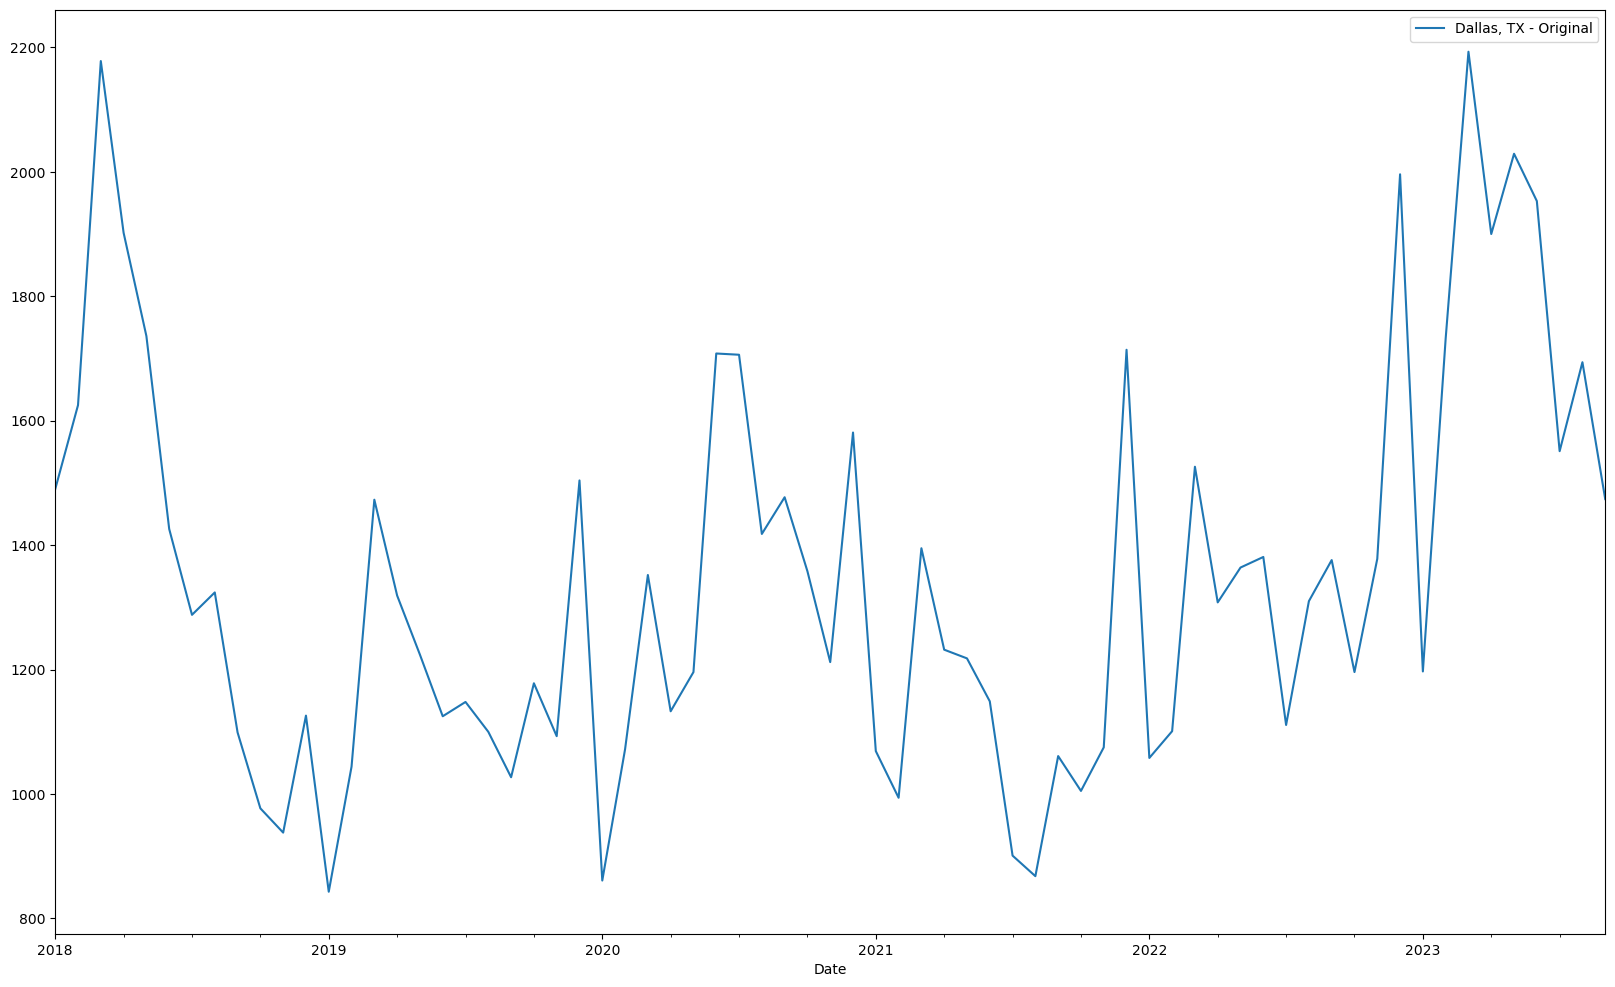

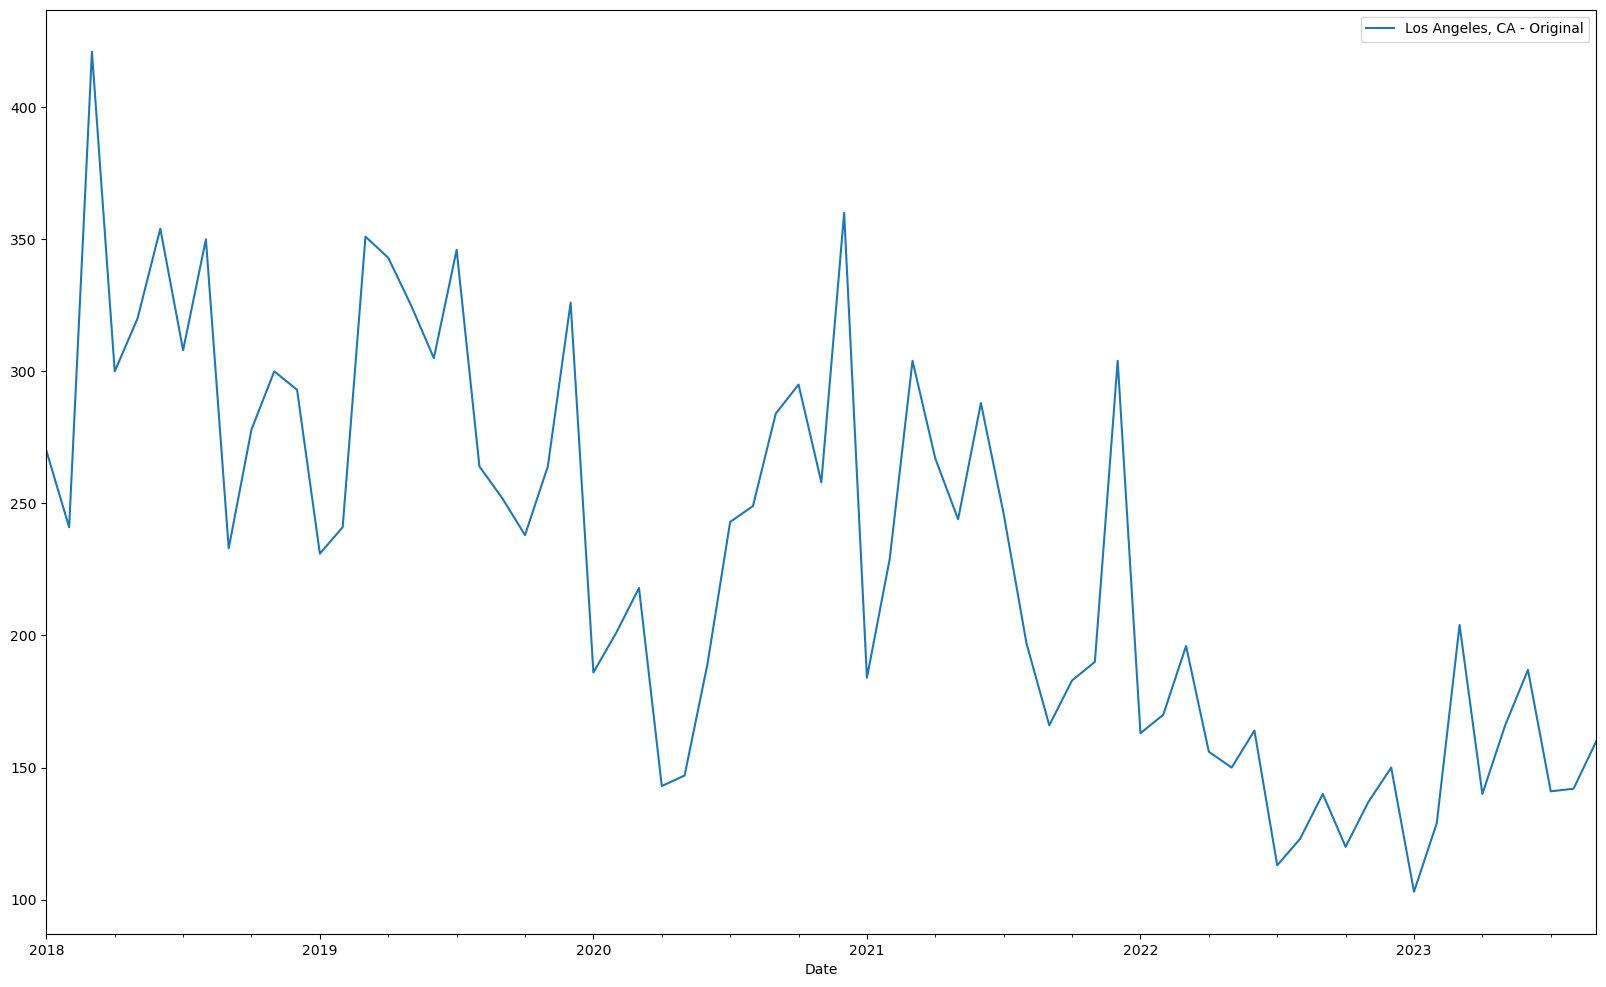

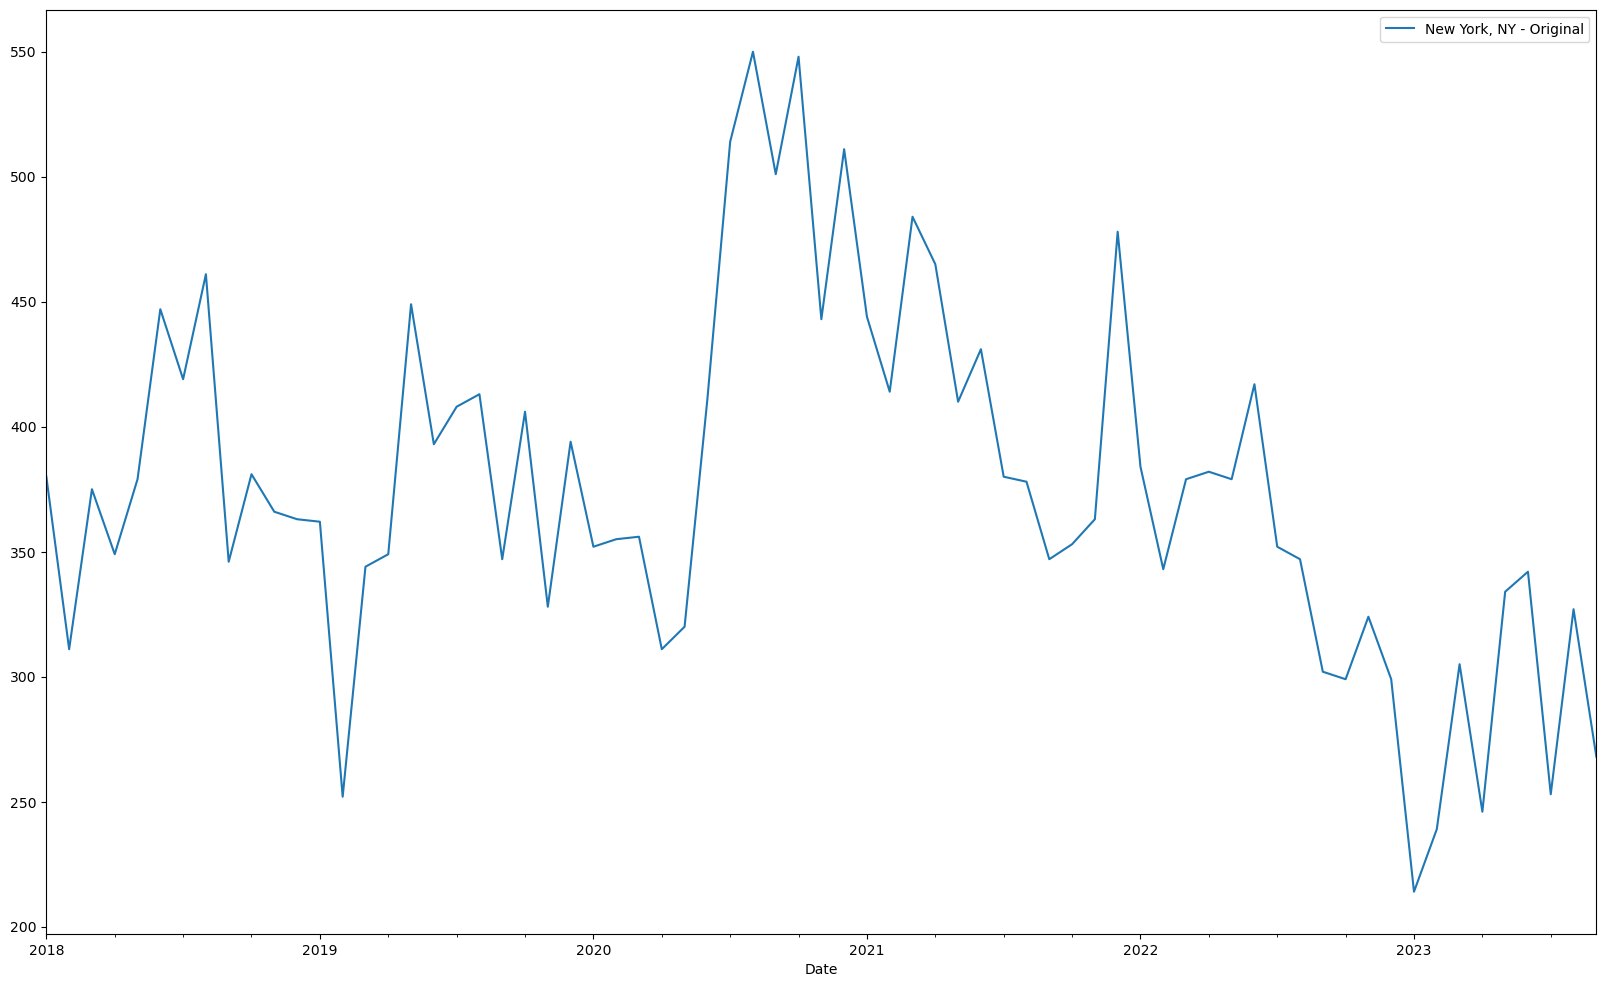

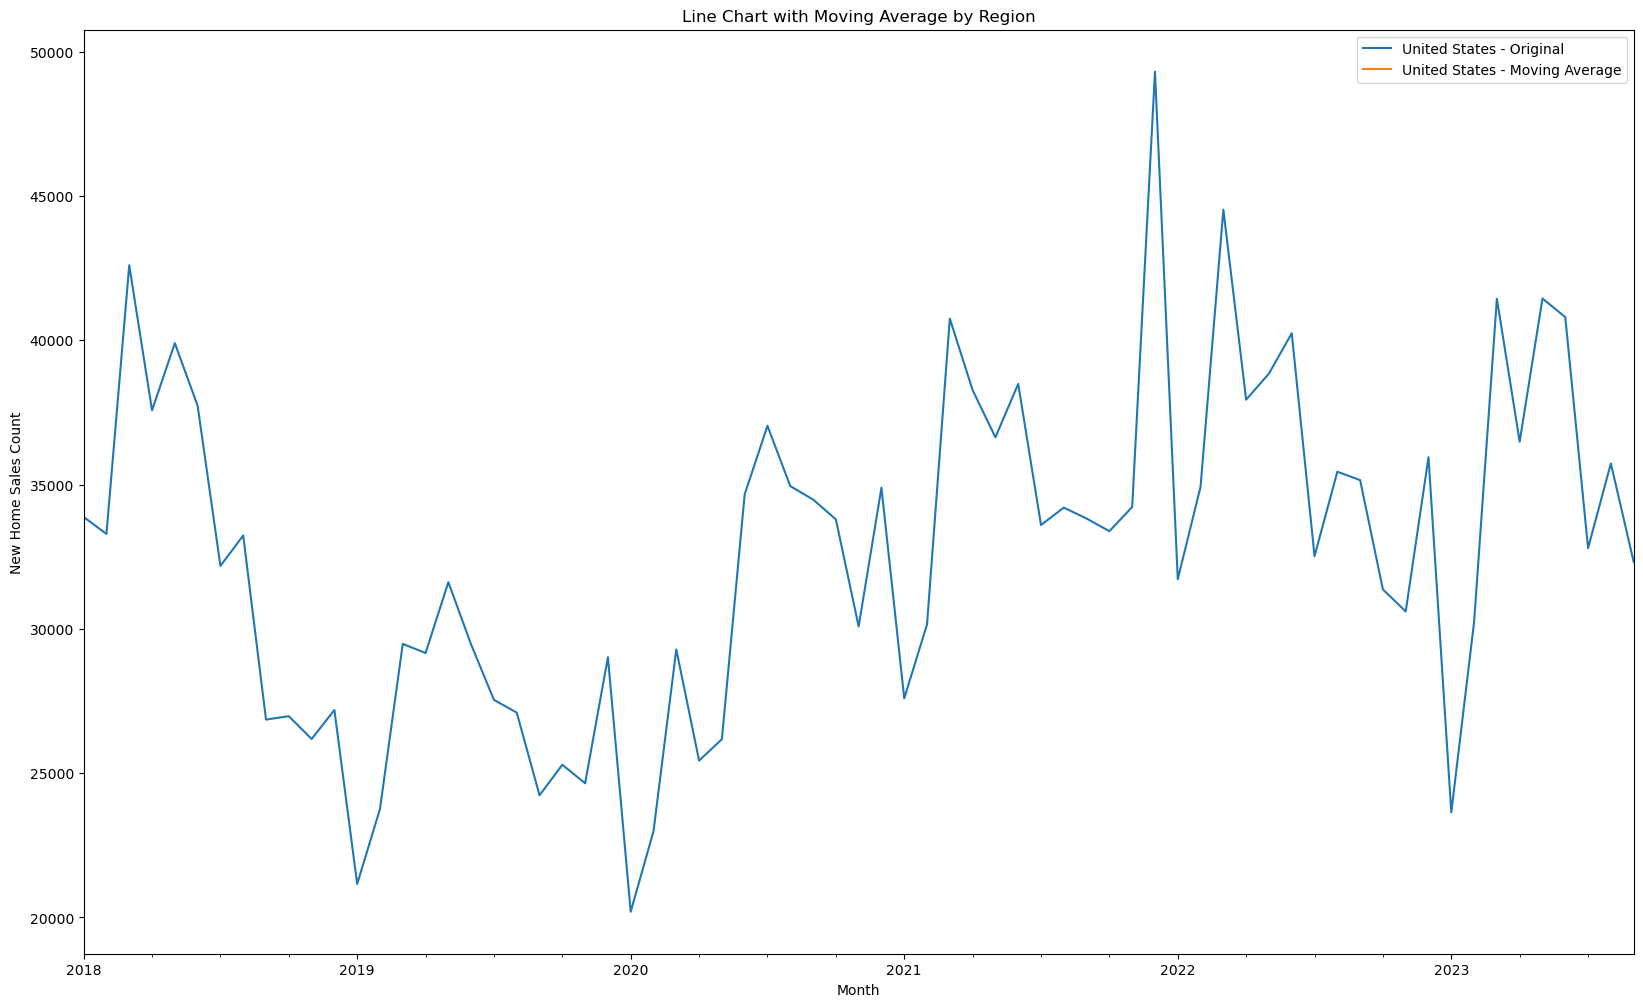

In [83]:
window_size = 3

for region, data in filtered_df.groupby('Region Name'):
    data.plot(kind='line', x='Date', y='New Home Sales Count', label=f'{region} - Original', figsize=(20, 12))

    rolling_avg = data['New Home Sales Count'].rolling(window=window_size).mean()
    plt.plot(data['Date'].iloc[window_size - 1:], rolling_avg.iloc[window_size - 1:], label=f'{region} - Moving Average')

plt.title('Line Chart with Moving Average by Region')
plt.xlabel('Month')
plt.ylabel('New Home Sales Count')
plt.legend()
plt.show()